In [525]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.base import clone
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

In [116]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

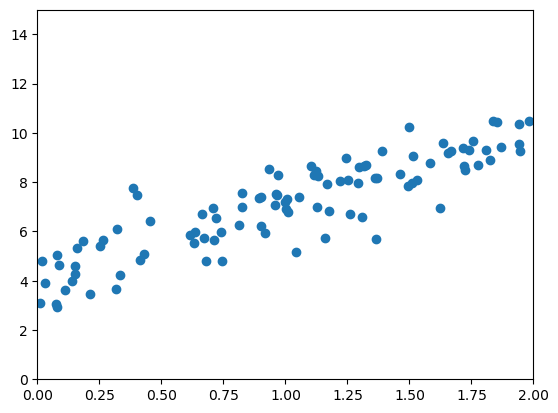

In [118]:
plt.scatter(X, y)
plt.axis([0, 2, 0, 15])
plt.show()

In [144]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [122]:
theta_best

array([[4.13654218],
       [2.95210127]])

In [124]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.13654218],
       [10.04074472]])

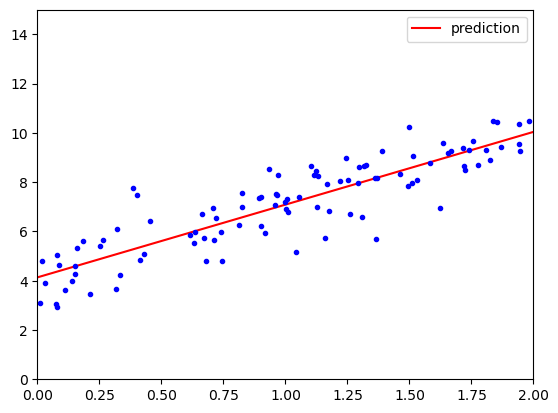

In [126]:
plt.plot(X_new, y_predict, "r-", label="prediction")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

In [128]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

In [130]:
theta_best_svd, residuals, rank, s

(array([[4.13654218],
        [2.95210127]]),
 array([79.79221083]),
 2,
 array([14.75982633,  3.8364769 ]))

In [132]:
np.linalg.pinv(X_b).dot(y)

array([[4.13654218],
       [2.95210127]])

In [138]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for iteration in range (n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [140]:
theta

array([[4.13654218],
       [2.95210127]])

In [151]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [153]:
theta

array([[4.02565525],
       [2.98303423]])

In [159]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

In [167]:
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [165]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10206304]), array([2.91870266]))

In [169]:
m = 100
X = 6 * np.random.rand(m,1)-3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

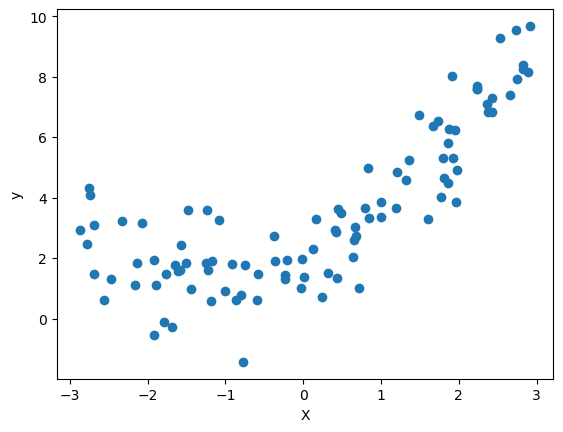

In [178]:
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [184]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [202]:
X_poly = poly_features.fit_transform(X)

In [212]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [214]:
lin_reg.intercept_, lin_reg.coef_

(array([1.9613068]), array([[1.08175482, 0.48188293]]))

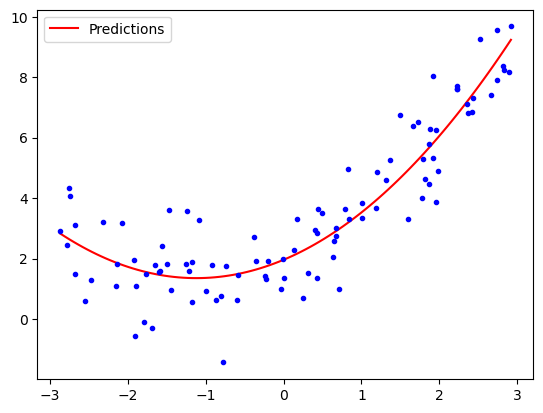

In [227]:
X_new = np.linspace(min(X), max(X), 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.legend()
plt.show()

In [446]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.axis([0, 80, 0, 3])
    plt.show()

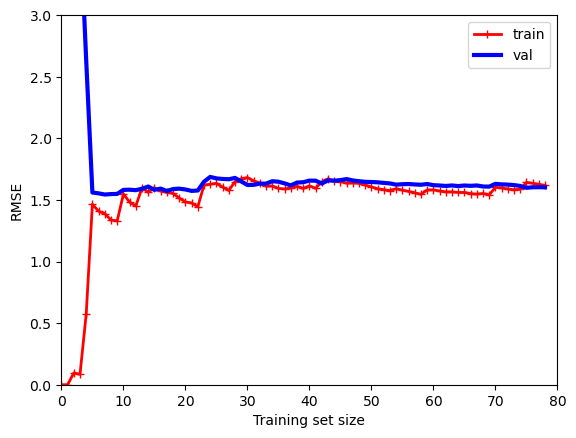

In [361]:
plot_learning_curves(lin_reg, X, y)

In [373]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
 ])

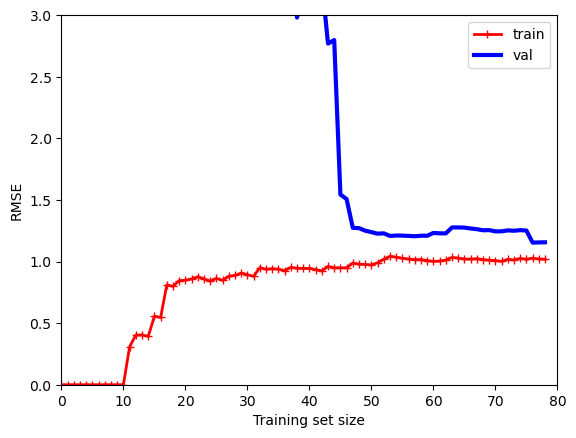

In [375]:
plot_learning_curves(polynomial_regression, X, y)

In [392]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.08229444]])

In [426]:
gd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.96422956])

In [420]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.04083422])

In [432]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.0380141])

In [484]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

0.8820718748589547

In [498]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=1e-3, warm_start=True,
                      penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [504]:
best_epoch, minimum_val_error

(755, 0.8424948593732633)

In [508]:
iris = datasets.load_iris()

In [510]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [523]:
X = iris["data"][:,3:]
y = (iris["target"] == 2).astype(np.int64)

In [531]:
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression()

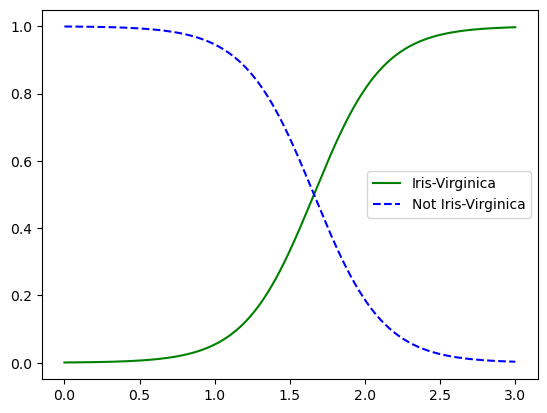

In [541]:
X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.legend()
plt.show()

In [543]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

In [547]:
X = iris["data"][:, (2, 3)]
y = iris["target"]

In [555]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [579]:
softmax_reg.predict([[5, 2]])

array([2])

In [565]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626372e-07, 5.73689802e-02, 9.42630398e-01]])